In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# 1. 데이터 로딩
url = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/refs/heads/main/wine.csv"
df = pd.read_csv(url)
print("=== 데이터 로딩 완료 ===")
print(df.head())

=== 데이터 로딩 완료 ===
   Wine  Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0     1    14.23        1.71  2.43  15.6  127     2.80        3.06   
1     1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2     1    13.16        2.36  2.67  18.6  101     2.80        3.24   
3     1    14.37        1.95  2.50  16.8  113     3.85        3.49   
4     1    13.24        2.59  2.87  21.0  118     2.80        2.69   

   Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                  0.28     2.29       5.64  1.04  3.92     1065  
1                  0.26     1.28       4.38  1.05  3.40     1050  
2                  0.30     2.81       5.68  1.03  3.17     1185  
3                  0.24     2.18       7.80  0.86  3.45     1480  
4                  0.39     1.82       4.32  1.04  2.93      735  


In [6]:
# 2. 결측치 확인
print("=== 결측치 확인 ===")
print(df.isnull().sum())

=== 결측치 확인 ===
Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64


In [8]:
# 3. 결측치 처리
# 'Alcohol' 컬럼의 결측치를 평균값으로 채우기
mean_alcohol = df['Alcohol'].mean()
df['Alcohol'] = df['Alcohol'].fillna(mean_alcohol)
df = df.dropna()  # 'Alcohol' 외의 다른 컬럼에 남은 결측치가 있는 행 제거
print("=== 결측치 처리 후 ===")
print(df.isnull().sum())

=== 결측치 처리 후 ===
Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64


레이블 분포:
Wine
2    71
1    59
3    48
Name: count, dtype: int64


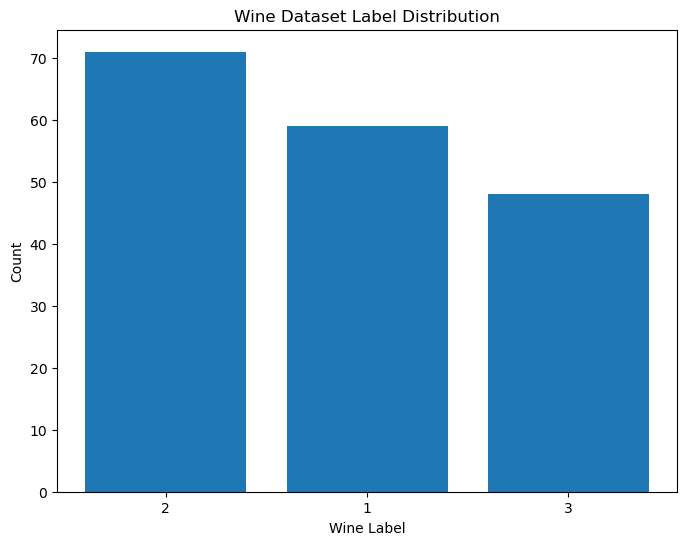

In [10]:
# 4. 레이블 확인 (불균형 데이터 확인)
# 'Wine' 컬럼의 각 레이블별 개수를 계산
label_counts = df['Wine'].value_counts()
print("레이블 분포:")
print(label_counts)

# 시각화를 통한 분포 확인
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(label_counts.index.astype(str), label_counts.values)
plt.xlabel('Wine Label')
plt.ylabel('Count')
plt.title('Wine Dataset Label Distribution')
plt.show()

In [12]:
# 5. 불필요한 컬럼 제거
# 예를 들어, 분석에 필요하지 않은 'Nonflavanoid.phenols'와 'Proanth' 컬럼을 제거
cols_to_drop = ['Nonflavanoid.phenols', 'Proanth']
df = df.drop(columns=cols_to_drop)

print("불필요한 컬럼 제거 후 컬럼 목록:")
print(df.columns)

불필요한 컬럼 제거 후 컬럼 목록:
Index(['Wine', 'Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Color.int', 'Hue', 'OD', 'Proline'],
      dtype='object')


In [38]:
# 예시: 다른 범주형 변수(예: 'Country', 'Category' 등)에 대해 one-hot 인코딩 적용
df_encoded = pd.get_dummies(df, drop_first=True)

# 혹시 남아 있을 수 있는 결측치는 0으로 채워줍니다.
df_encoded = df_encoded.fillna(0)
print("One-Hot 인코딩 후 데이터프레임의 일부:")
print(df_encoded.head())

One-Hot 인코딩 후 데이터프레임의 일부:
   Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  Color.int   Hue  \
0    14.23        1.71  2.43  15.6  127     2.80        3.06       5.64  1.04   
1    13.20        1.78  2.14  11.2  100     2.65        2.76       4.38  1.05   
2    13.16        2.36  2.67  18.6  101     2.80        3.24       5.68  1.03   
3    14.37        1.95  2.50  16.8  113     3.85        3.49       7.80  0.86   
4    13.24        2.59  2.87  21.0  118     2.80        2.69       4.32  1.04   

     OD  Proline  Wine_0  Wine_1  Wine_2  
0  3.92     1065    True   False   False  
1  3.40     1050    True   False   False  
2  3.17     1185    True   False   False  
3  3.45     1480    True   False   False  
4  2.93      735    True   False   False  


In [46]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# 타깃 레이블 추출: one-hot 인코딩된 Wine 컬럼에서 정수형 레이블 생성
# 각 행에서 True인 컬럼의 인덱스(0,1,2)를 이용
y = np.argmax(df_encoded[['Wine_0', 'Wine_1', 'Wine_2']].values, axis=1)

# 특성(feature): Wine 관련 one-hot 컬럼은 타깃으로 사용했으므로 제거
X = df_encoded.drop(columns=['Wine_0', 'Wine_1', 'Wine_2'])

# 학습/테스트 세트 분할 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 분류 모델 정의
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=200, random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(random_state=42)
}

print("=== 분류 모델 평가 결과 ===")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f"{name}: Accuracy = {acc:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("\n")

=== 분류 모델 평가 결과 ===
Random Forest: Accuracy = 1.0000
Confusion Matrix:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


Decision Tree: Accuracy = 0.9444
Confusion Matrix:
[[13  1  0]
 [ 0 14  0]
 [ 0  1  7]]


Logistic Regression: Accuracy = 0.9722
Confusion Matrix:
[[13  1  0]
 [ 0 14  0]
 [ 0  0  8]]


KNN: Accuracy = 0.7222
Confusion Matrix:
[[12  0  2]
 [ 0 11  3]
 [ 2  3  3]]


SVM: Accuracy = 0.7778
Confusion Matrix:
[[14  0  0]
 [ 0 10  4]
 [ 0  4  4]]




/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
